<a href="https://colab.research.google.com/github/deekshitha27062007/Task-1/blob/main/titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows:
    PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  

Missing values:
 PassengerId      0
Survived         0
Pclass         

<ipython-input-7-7e87aea7f8e3>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-7-7e87aea7f8e3>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

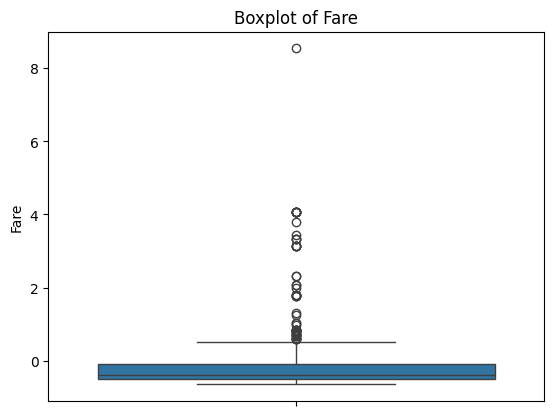


Cleaned data:
    PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name       Age  SibSp  Parch  \
0                              Kelly, Mr. James  0.334993      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  1.325530      1      0   
2                     Myles, Mr. Thomas Francis  2.514175      0      0   
3                              Wirz, Mr. Albert -0.259330      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist) -0.655545      1      1   

    Ticket      Fare  Sex_male  Embarked_Q  Embarked_S  
0   330911 -0.497811      True        True       False  
1   363272 -0.512660     False       False        True  
2   240276 -0.464532      True        True       False  
3   315154 -0.482888      True       False        True  
4  3101298 -0.417971     False 

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("titanic.csv.zip")
print("First 5 rows:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
sns.boxplot(df['Fare'])
plt.title("Boxplot of Fare")
plt.show()
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Fare'] >= Q1 - 1.5 * IQR) & (df['Fare'] <= Q3 + 1.5 * IQR)]
print("\nCleaned data:\n", df.head())
print("\nShape of cleaned data:", df.shape)
